In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Libraries imported successfully!")


📊 Libraries imported successfully!


In [2]:
# Define time period and stocks
start_date = '2023-01-01'
end_date = '2023-12-31'
stocks = ['NVDA', 'HD']
stock_names = {'NVDA': 'NVIDIA Corp', 'HD': 'Home Depot Inc'}

print(f"🎯 Analysis period: {start_date} to {end_date}")
print(f"📈 Stocks: {', '.join([f'{stock} ({stock_names[stock]})' for stock in stocks])}")


🎯 Analysis period: 2023-01-01 to 2023-12-31
📈 Stocks: NVDA (NVIDIA Corp), HD (Home Depot Inc)


In [3]:
# Download stock data
print("🔄 Downloading stock data...")

try:
    data = yf.download(
        stocks,
        start=start_date,
        end=end_date,
        auto_adjust=True,
        progress=False
    )['Close']
    
    # Handle single stock case
    if len(stocks) == 1:
        data = pd.DataFrame({stocks[0]: data})
    
    print(f"✅ Successfully downloaded {len(data)} trading days of data")
    print(f"📅 Date range: {data.index[0].strftime('%Y-%m-%d')} to {data.index[-1].strftime('%Y-%m-%d')}")
    
    # Display basic info
    print("\n📋 Data Summary:")
    display(data.describe().round(2))
    
except Exception as e:
    print(f"❌ Error downloading data: {e}")
    raise


🔄 Downloading stock data...
✅ Successfully downloaded 250 trading days of data
📅 Date range: 2023-01-03 to 2023-12-29

📋 Data Summary:


Ticker,HD,NVDA
count,250.00,250.00
mean,294.85,36.55
std,18.14,10.75
min,266.36,14.25
25%,279.62,26.88
50%,293.40,41.87
75%,309.65,45.62
max,343.36,50.39


In [4]:
# Calculate log returns
print("📊 Calculating log returns...")

# Calculate log returns: ln(P_t / P_{t-1})
log_returns = np.log(data / data.shift(1)).dropna()

# Calculate cumulative log returns
cumulative_log_returns = log_returns.cumsum()

print(f"✅ Calculated log returns for {len(log_returns)} trading days")

# Display log returns statistics
print("\n📈 Log Returns Statistics:")
stats_df = pd.DataFrame({
    'Mean': log_returns.mean(),
    'Std Dev': log_returns.std(),
    'Skewness': log_returns.skew(),
    'Kurtosis': log_returns.kurtosis(),
    'Min': log_returns.min(),
    'Max': log_returns.max()
}).round(4)

display(stats_df)


📊 Calculating log returns...
✅ Calculated log returns for 249 trading days

📈 Log Returns Statistics:


,Mean,Std Dev,Skewness,Kurtosis,Min,Max
Ticker,,,,,,
HD,0.0005,0.0136,-0.4268,3.9063,-0.0732,0.0526
NVDA,0.0050,0.0295,1.8557,11.2627,-0.0609,0.2181


📈 Creating Log Prices plot (similar to your lnAMZN and lnEBAY graph)...
📊 Creating Log Returns plot (my approach for volatility analysis)...


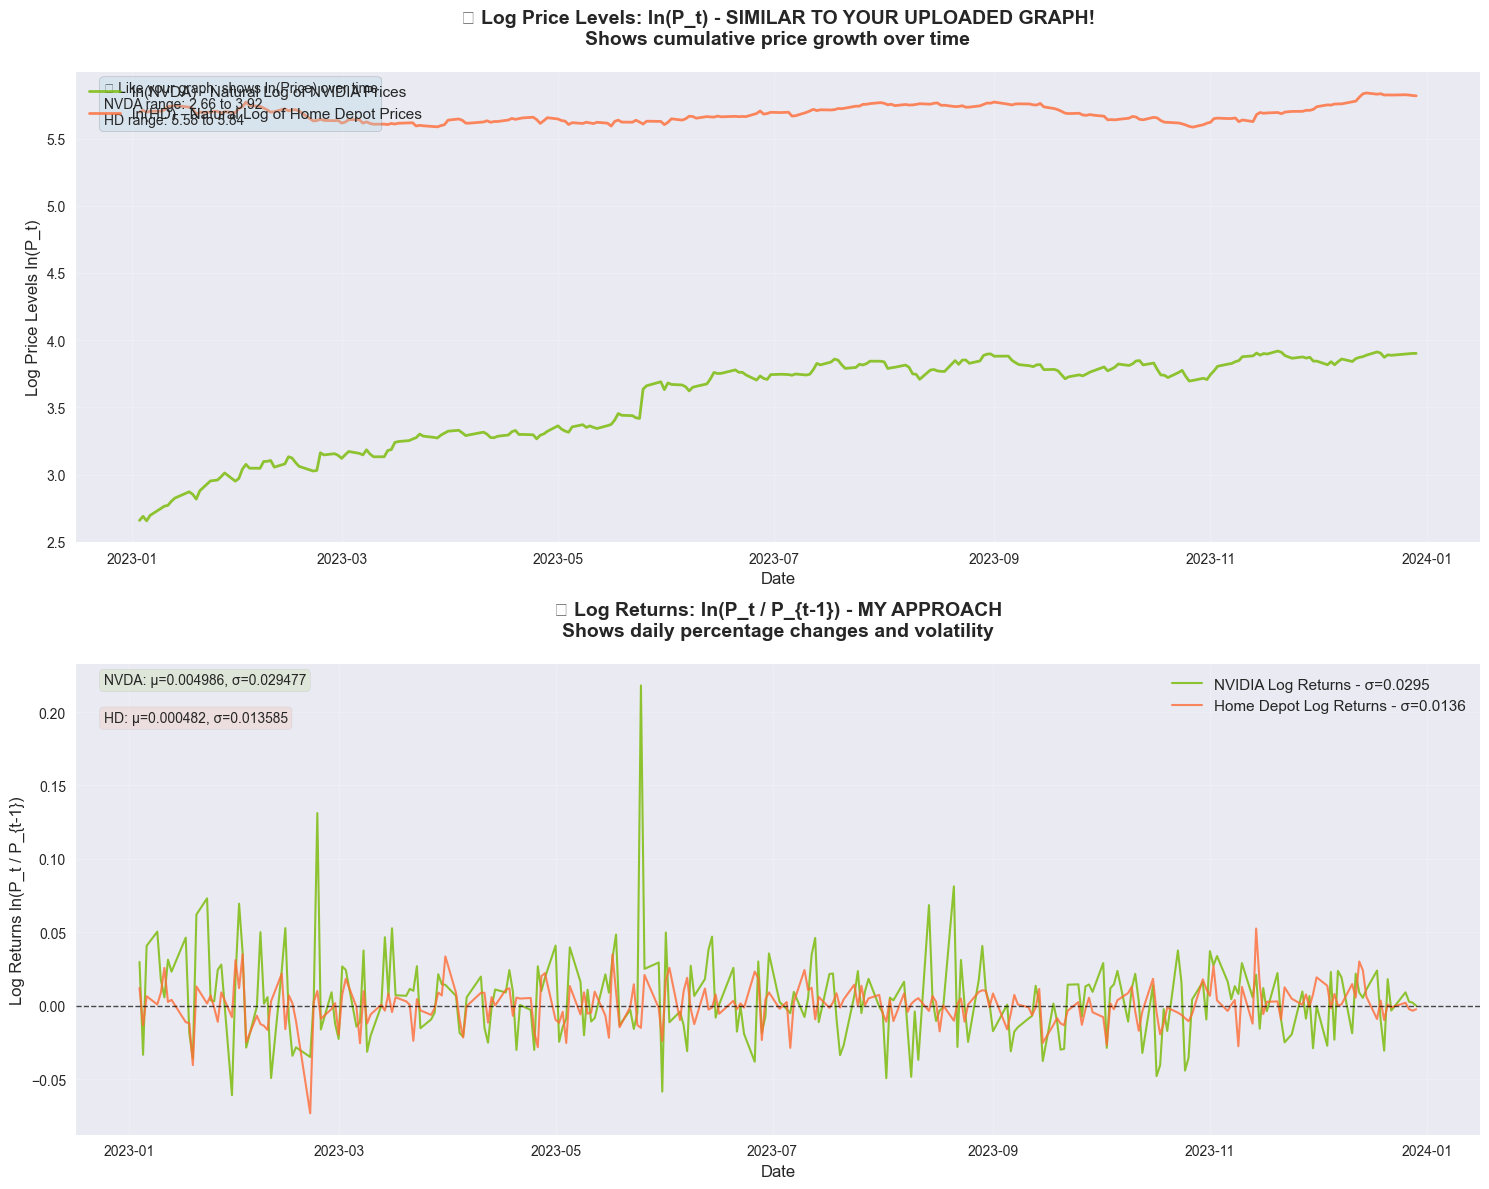


🎯 COMPARISON COMPLETED!

💡 KEY DIFFERENCES EXPLAINED:
📈 TOP GRAPH (Log Prices ln(P_t)):
   • Similar to your lnAMZN and lnEBAY graph
   • Shows price LEVELS over time
   • Values typically range from ~2 to ~7+ (depends on stock price)
   • Generally upward trending (stock appreciation)
   • Used for: Long-term growth analysis

📊 BOTTOM GRAPH (Log Returns ln(P_t/P_{t-1})):
   • My original approach for volatility analysis
   • Shows price CHANGES over time
   • Values typically range from -0.1 to +0.1 (around zero)
   • Fluctuates around zero (daily movements)
   • Used for: Risk analysis, pair trading, volatility modeling

🔗 RELATIONSHIP: Log Returns = ln(P_t) - ln(P_{t-1})
   So your graph shows the 'levels' and mine shows the 'differences'!


In [5]:
# 🎯 COMPARISON: Log Prices vs Log Returns (Your Graph vs My Approach)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Define colors
colors = {'NVDA': '#76B900', 'HD': '#FF6B35'}  # NVIDIA green, Home Depot orange

# 1. LOG PRICES (like your uploaded graph) - ln(P_t)
print("📈 Creating Log Prices plot (similar to your lnAMZN and lnEBAY graph)...")
log_prices = np.log(data)

ax1.plot(log_prices.index, log_prices['NVDA'], 
         color=colors['NVDA'], linewidth=2, alpha=0.8,
         label=f'ln(NVDA) - Natural Log of NVIDIA Prices')

ax1.plot(log_prices.index, log_prices['HD'], 
         color=colors['HD'], linewidth=2, alpha=0.8,
         label=f'ln(HD) - Natural Log of Home Depot Prices')

ax1.set_title('📈 Log Price Levels: ln(P_t) - SIMILAR TO YOUR UPLOADED GRAPH!\n' + 
              f'Shows cumulative price growth over time', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Log Price Levels ln(P_t)', fontsize=12)
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Add range info
nvda_range = f"{log_prices['NVDA'].min():.2f} to {log_prices['NVDA'].max():.2f}"
hd_range = f"{log_prices['HD'].min():.2f} to {log_prices['HD'].max():.2f}"
ax1.text(0.02, 0.98, f'📊 Like your graph: shows ln(Price) over time\nNVDA range: {nvda_range}\nHD range: {hd_range}',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

# 2. LOG RETURNS (my original approach) - ln(P_t / P_{t-1})
print("📊 Creating Log Returns plot (my approach for volatility analysis)...")

ax2.plot(log_returns.index, log_returns['NVDA'], 
         color=colors['NVDA'], linewidth=1.5, alpha=0.8,
         label=f'NVIDIA Log Returns - σ={log_returns["NVDA"].std():.4f}')

ax2.plot(log_returns.index, log_returns['HD'], 
         color=colors['HD'], linewidth=1.5, alpha=0.8,
         label=f'Home Depot Log Returns - σ={log_returns["HD"].std():.4f}')

ax2.set_title('🎯 Log Returns: ln(P_t / P_{t-1}) - MY APPROACH\n' + 
              'Shows daily percentage changes and volatility', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Log Returns ln(P_t / P_{t-1})', fontsize=12)
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=1)

# Add statistical annotations for log returns
ax2.text(0.02, 0.98, f'NVDA: μ={log_returns["NVDA"].mean():.6f}, σ={log_returns["NVDA"].std():.6f}',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor=colors['NVDA'], alpha=0.1))

ax2.text(0.02, 0.90, f'HD: μ={log_returns["HD"].mean():.6f}, σ={log_returns["HD"].std():.6f}',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor=colors['HD'], alpha=0.1))

plt.tight_layout()
plt.show()

print("\n🎯 COMPARISON COMPLETED!")
print("\n💡 KEY DIFFERENCES EXPLAINED:")
print("=" * 50)
print("📈 TOP GRAPH (Log Prices ln(P_t)):")
print("   • Similar to your lnAMZN and lnEBAY graph")
print("   • Shows price LEVELS over time")
print("   • Values typically range from ~2 to ~7+ (depends on stock price)")
print("   • Generally upward trending (stock appreciation)")
print("   • Used for: Long-term growth analysis")
print()
print("📊 BOTTOM GRAPH (Log Returns ln(P_t/P_{t-1})):")
print("   • My original approach for volatility analysis")
print("   • Shows price CHANGES over time") 
print("   • Values typically range from -0.1 to +0.1 (around zero)")
print("   • Fluctuates around zero (daily movements)")
print("   • Used for: Risk analysis, pair trading, volatility modeling")
print()
print("🔗 RELATIONSHIP: Log Returns = ln(P_t) - ln(P_{t-1})")
print("   So your graph shows the 'levels' and mine shows the 'differences'!")


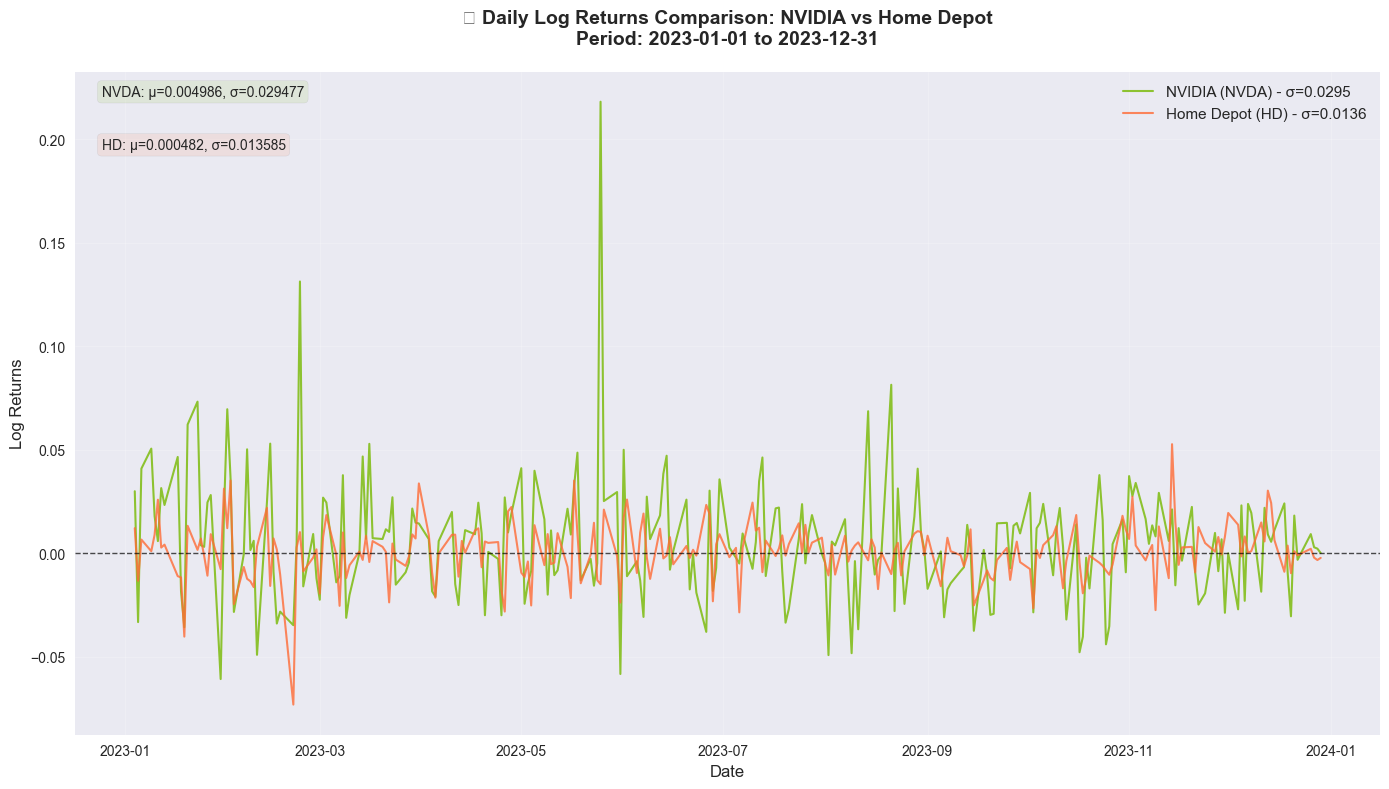

🎯 Log returns comparison completed!


In [6]:
# Create the main log returns comparison plot
plt.figure(figsize=(14, 8))

# Define colors
colors = {'NVDA': '#76B900', 'HD': '#FF6B35'}  # NVIDIA green, Home Depot orange

# Plot daily log returns with enhanced styling
plt.plot(log_returns.index, log_returns['NVDA'], 
         color=colors['NVDA'], linewidth=1.5, alpha=0.8,
         label=f'NVIDIA (NVDA) - σ={log_returns["NVDA"].std():.4f}')

plt.plot(log_returns.index, log_returns['HD'], 
         color=colors['HD'], linewidth=1.5, alpha=0.8,
         label=f'Home Depot (HD) - σ={log_returns["HD"].std():.4f}')

# Enhance the plot
plt.title('🎯 Daily Log Returns Comparison: NVIDIA vs Home Depot\n' + 
          f'Period: {start_date} to {end_date}', 
          fontsize=14, fontweight='bold', pad=20)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Returns', fontsize=12)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=1)

# Add statistical annotations
plt.text(0.02, 0.98, f'NVDA: μ={log_returns["NVDA"].mean():.6f}, σ={log_returns["NVDA"].std():.6f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor=colors['NVDA'], alpha=0.1))

plt.text(0.02, 0.90, f'HD: μ={log_returns["HD"].mean():.6f}, σ={log_returns["HD"].std():.6f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor=colors['HD'], alpha=0.1))

plt.tight_layout()
plt.show()

print("🎯 Log returns comparison completed!")


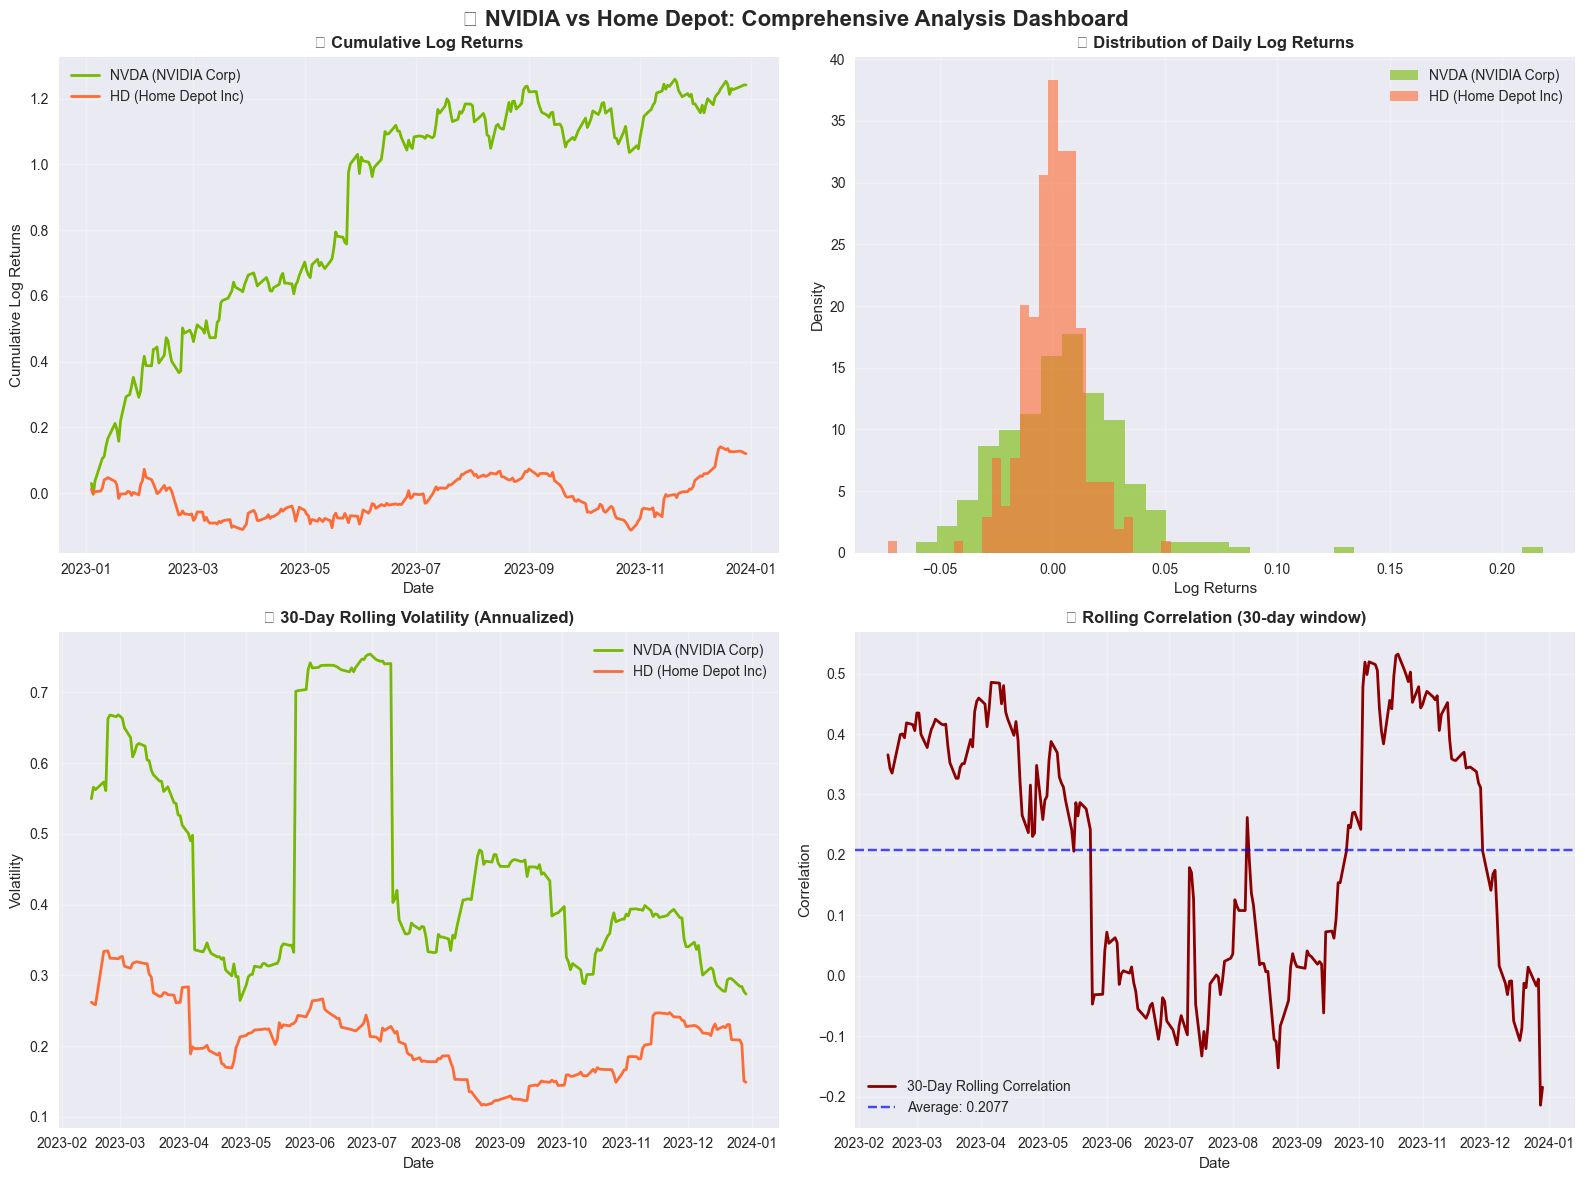

✅ Comprehensive dashboard completed!


In [7]:
# Create comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 NVIDIA vs Home Depot: Comprehensive Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Cumulative Log Returns
ax1 = axes[0, 0]
for stock in stocks:
    ax1.plot(cumulative_log_returns.index, cumulative_log_returns[stock], 
             color=colors[stock], linewidth=2,
             label=f'{stock} ({stock_names[stock]})')

ax1.set_title('📈 Cumulative Log Returns', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Log Returns')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Distribution of Log Returns
ax2 = axes[0, 1]
for stock in stocks:
    ax2.hist(log_returns[stock], bins=30, alpha=0.6, 
             color=colors[stock], density=True,
             label=f'{stock} ({stock_names[stock]})')

ax2.set_title('📊 Distribution of Daily Log Returns', fontweight='bold')
ax2.set_xlabel('Log Returns')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Rolling Volatility (30-day)
ax3 = axes[1, 0]
rolling_vol = log_returns.rolling(window=30).std() * np.sqrt(252)  # Annualized volatility

for stock in stocks:
    ax3.plot(rolling_vol.index, rolling_vol[stock], 
             color=colors[stock], linewidth=2,
             label=f'{stock} ({stock_names[stock]})')

ax3.set_title('📈 30-Day Rolling Volatility (Annualized)', fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Volatility')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Rolling Correlation
ax4 = axes[1, 1]
rolling_corr = log_returns['NVDA'].rolling(window=30).corr(log_returns['HD'])
correlation = log_returns['NVDA'].corr(log_returns['HD'])

ax4.plot(rolling_corr.index, rolling_corr, color='darkred', linewidth=2,
         label='30-Day Rolling Correlation')
ax4.axhline(y=correlation, color='blue', linestyle='--', alpha=0.7, 
           label=f'Average: {correlation:.4f}')
ax4.set_title('📈 Rolling Correlation (30-day window)', fontweight='bold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Correlation')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Comprehensive dashboard completed!")


In [8]:
# Performance metrics comparison table
print("📊 Creating comprehensive performance metrics table...")

# Calculate additional metrics
metrics = {}

for stock in stocks:
    returns = log_returns[stock]
    
    metrics[stock] = {
        'Total Return (%)': (np.exp(cumulative_log_returns[stock].iloc[-1]) - 1) * 100,
        'Annualized Return (%)': returns.mean() * 252 * 100,
        'Annualized Volatility (%)': returns.std() * np.sqrt(252) * 100,
        'Sharpe Ratio': (returns.mean() * 252) / (returns.std() * np.sqrt(252)),
        'Max Daily Return (%)': returns.max() * 100,
        'Min Daily Return (%)': returns.min() * 100,
        'Skewness': returns.skew(),
        'Kurtosis': returns.kurtosis(),
        'VaR (95%)': np.percentile(returns, 5) * 100,
        'Max Drawdown (%)': ((cumulative_log_returns[stock].cummax() - cumulative_log_returns[stock]).max()) * 100
    }

# Create comparison table
comparison_df = pd.DataFrame(metrics).round(4)
comparison_df.columns = [f'{stock}\n({stock_names[stock]})' for stock in stocks]

print("\n🏆 Performance Metrics Comparison:")
display(comparison_df.style.format('{:.4f}').set_caption(
    f"Performance Comparison: {start_date} to {end_date}"
))

# Calculate correlation
correlation = log_returns['NVDA'].corr(log_returns['HD'])
print(f"\n🔗 Log Returns Correlation: {correlation:.4f}")

# Summary insights
nvda_total_return = (np.exp(cumulative_log_returns['NVDA'].iloc[-1]) - 1) * 100
hd_total_return = (np.exp(cumulative_log_returns['HD'].iloc[-1]) - 1) * 100

print(f"\n💡 Key Insights:")
print(f"  • NVIDIA Total Return: {nvda_total_return:.2f}%")
print(f"  • Home Depot Total Return: {hd_total_return:.2f}%")
print(f"  • {'NVIDIA' if nvda_total_return > hd_total_return else 'Home Depot'} outperformed during this period")
print(f"  • NVIDIA shows {'higher' if log_returns['NVDA'].std() > log_returns['HD'].std() else 'lower'} volatility than Home Depot")


📊 Creating comprehensive performance metrics table...

🏆 Performance Metrics Comparison:


,NVDA (NVIDIA Corp),HD (Home Depot Inc)
Total Return (%),246.0983,12.7515
Annualized Return (%),125.6511,12.1462
Annualized Volatility (%),46.7935,21.5658
Sharpe Ratio,2.6852,0.5632
Max Daily Return (%),21.8088,5.2606
Min Daily Return (%),-6.0888,-7.3225
Skewness,1.8557,-0.4268
Kurtosis,11.2627,3.9063
VaR (95%),-3.5188,-2.2691
Max Drawdown (%),20.1960,18.6317



🔗 Log Returns Correlation: 0.2077

💡 Key Insights:
  • NVIDIA Total Return: 246.10%
  • Home Depot Total Return: 12.75%
  • NVIDIA outperformed during this period
  • NVIDIA shows higher volatility than Home Depot
